## Filters

Start with our usual setup, including the utility methods from last time.

In [80]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# provide methods for loading and displaying images
def load(image_path):
    out = io.imread(image_path)
    out = out.astype(np.float64) / 255
    return out

def display(img, title=None):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# As usual, you may use your own images, but you must include them in your submission.
image_path = './dog.jpg'

image = load(image_path)

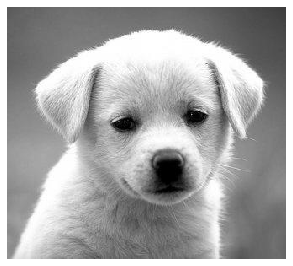

In [81]:
display(image)

We provide a naive implementation of a grayscale convolutional filter:

In [82]:
import math
def naive_convolution_filter(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    out = np.zeros(image.shape)
    
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):

            output_value = 0
            
            for kernel_row in range(kernel.shape[0]):
                for kernel_column in range(kernel.shape[1]):
                    
                    # how far the kernel extends from current pixel
                    image_row_offset = math.ceil(kernel_row - kernel.shape[0] / 2) 
                    image_column_offset = math.ceil(kernel_column - kernel.shape[1] / 2)
                    
                    # only apply kernel to the image and not off the edge
                    if (image_row + image_row_offset < 0 or 
                        image_row + image_row_offset >= image.shape[0] or
                        image_column + image_column_offset < 0 or 
                        image_column + image_column_offset >= image.shape[1]):
                        image_value = 0
                    else:
                        image_value = image[image_row + image_row_offset, image_column + image_column_offset]

                    # apply the kernel
                    output_value += image_value * kernel[kernel_row, kernel_column]

            out[image_row, image_column] = output_value
            
    return out

## Exercise 1

1. Take a look at the filters in the following code cell. What do you think they do? You may want to run `display()` on the filter to visualize it.

`filter1` shifts the image over 2 pixels left, and fills in the new pixels on the right with black.

`filter2` multiplies all the pixel values by 2, increasing the exposure of the image.

`filter3` emphasizes/texturizes the image by emphasizing each individual pixel from its neighbors.

2. Run the filters using `naive_convolution_filter` to verify your answer.

In [83]:
filter1 = np.array(
[
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,1],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

filter2 = np.array(
[
    [0,0,0],
    [0,2,0],
    [0,0,0]
])

# Hint: check the lecture slides for a familiar-looking filter
filter3 = np.array(
[
    [-.11,-.11,-.11],
    [-.11,1.88,-.11],
    [-.11,-.11,-.11],
])


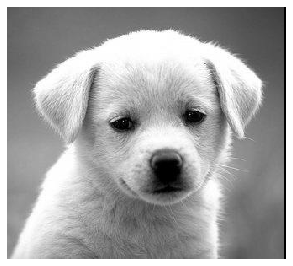

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


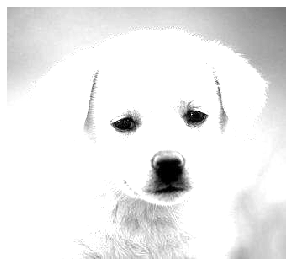

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


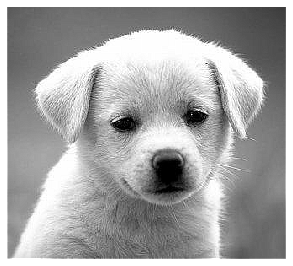

In [84]:
display(naive_convolution_filter(image, filter1))
display(naive_convolution_filter(image, filter2))
display(naive_convolution_filter(image, filter3))

## Exercise 2
So far, we've only run the naive implementation on a grayscale image. Add a color image of your choice and run a filter on it, showing both the original image and the output of the filter.

As you can see, the filter runs on all three channels. Create an implementation that allows applying different filters to each channel, and submit the output of using at least two different filters on the same image.

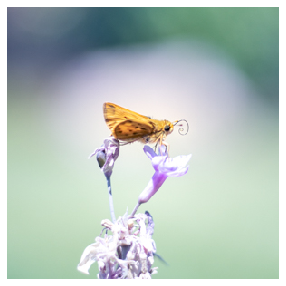

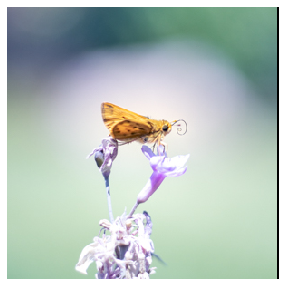

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


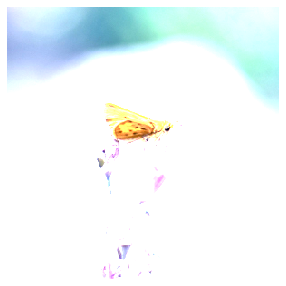

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


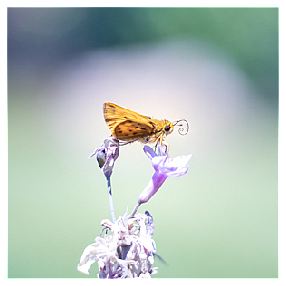

In [85]:
image_color = load("./moth.jpg")

display(image_color)
display(naive_convolution_filter(image_color, filter1))
display(naive_convolution_filter(image_color, filter2))
display(naive_convolution_filter(image_color, filter3))

My implementation that allows applying different filters to each channel. This function is also used for Advanced Exercise 1 (edge behavior).

In [96]:
def ncf(image, kernel, space, channel, edge_behavior="zero"):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
        space: the color space (i.e., "RGB")
        channel: the channel which the filter will be applied to (R, G, B)
        edge_behavior: "zero" or "replicate" or "mirror"
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    
    out = image.copy()
    full_channels = False # if we don't want to filter a specific channel
    
    if channel == space:
        full_channels = True
    elif channel == space[0]:
        channel_index = 0
    elif channel == space[1]:
        channel_index = 1
    else:
        channel_index = 2
    
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):

            output_value = 0
            
            for kernel_row in range(kernel.shape[0]):
                for kernel_column in range(kernel.shape[1]):
                    
                    # how far the kernel extends from current pixel
                    image_row_offset = math.ceil(kernel_row - kernel.shape[0] / 2)
                    image_column_offset = math.ceil(kernel_column - kernel.shape[1] / 2)
                    
                    # only apply kernel to the image and not off the edge
                    if (image_row + image_row_offset < 0 or 
                        image_row + image_row_offset >= image.shape[0] or
                        image_column + image_column_offset < 0 or 
                        image_column + image_column_offset >= image.shape[1]):

                        # edge behavior
                        if edge_behavior == "zero":
                            image_value = 0
                        
                        # replicate edge
                        elif edge_behavior == "replicate":
                            if image_row + image_row_offset < 0: # off the top
                                cur_row = 0
                            elif image_row + image_row_offset >= image.shape[0]: # off the bottom
                                cur_row = image.shape[0]-1
                            else: # not off the rows
                                cur_row = image_row + image_row_offset
                            
                            if image_column + image_column_offset < 0: # off the left
                                cur_col = 0
                            elif image_column + image_column_offset >= image.shape[1]: # off the right
                                cur_col = image.shape[1]-1
                            else: # not off the columns
                                cur_col = image_column + image_column_offset

                            image_value = image[cur_row][cur_col] if full_channels else image[cur_row][cur_col][channel_index]
                        
                        # mirror edge
                        elif edge_behavior == "mirror":
                            
                            if image_row + image_row_offset < 0: # off the top
                                off_row = 0 - (image_row + image_row_offset)
                            elif image_row + image_row_offset >= image.shape[0]: # off the bottom
                                off_row = image.shape[0] - 1 - ((image_row + image_row_offset) - image.shape[0])
                            else: # not off the rows
                                off_row = image_row + image_row_offset
                            
                            if image_column + image_column_offset < 0: # off the left
                                off_col = 0 - (image_column + image_column_offset)
                            elif image_column + image_column_offset >= image.shape[1]: # off the right
                                off_col = image.shape[1] - 1 - ((image_column + image_column_offset) - image.shape[1])
                            else: # not off the columns
                                off_col = image_column + image_column_offset

                            image_value = image[off_row][off_col] if full_channels else image[off_row][off_col][channel_index]
                            
                    else:

                        image_value = image[image_row + image_row_offset, image_column + image_column_offset] if full_channels else image[image_row + image_row_offset, image_column + image_column_offset, channel_index]

                    # apply the kernel
                    output_value += image_value * kernel[kernel_row, kernel_column]

            if full_channels:
                out[image_row, image_column] = output_value
            else:
                out[image_row, image_column, channel_index] = output_value
            
    return out


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


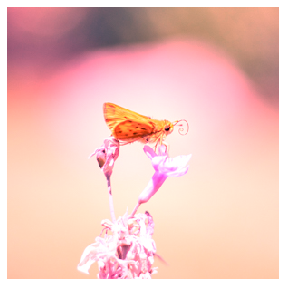

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


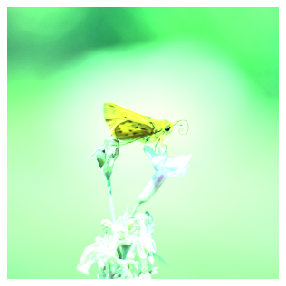

In [87]:
display(ncf(image_color, filter2, "RGB", "R"))
display(ncf(image_color, filter2, "RGB", "G"))

## Exercise 3
Create your own filter(s) and describe their output.

I created two averaging filters to make the image blurrier, the first filter is a stronger blur than the second. I wanted to try applying these filters in the HLS (hue, luminance, saturation) color space, because one of the ways I can edit my photos are hue, saturation, and luminance sliders for each color.

In [88]:
filter_hls1 = np.array(
[
    [0.11, 0.11, 0.11],
    [0.11, 0.11, 0.11],
    [0.11, 0.11, 0.11]
])

filter_hls2 = np.array(
[
    [0.04,0.04,0.04,0.04,0.04],
    [0.04,0.04,0.04,0.04,0.04],
    [0.04,0.04,0.04,0.04,0.04],
    [0.04,0.04,0.04,0.04,0.04],
    [0.04,0.04,0.04,0.04,0.04],
])

I created a function to convert between HLS (hue, luminance, saturation) color space so I can apply filters to those attributes.

In [89]:
import colorsys

def rgb2hls(image):
    out = image.copy()
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
#             print(out[r][c])
            out[r][c] = colorsys.rgb_to_hls(image[r][c][0], image[r][c][1], image[r][c][2])
#             print(colorsys.rgb_to_hls(image[r][c][0], image[r][c][1], image[r][c][2]))
#             print(out[r][c])
    return out

def hls2rgb(image):
    out = image.copy()
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
#             print(out[r][c])
            out[r][c] = colorsys.hls_to_rgb(image[r][c][0], image[r][c][1], image[r][c][2])
#             print(colorsys.rgb_to_hls(image[r][c][0], image[r][c][1], image[r][c][2]))
#             print(out[r][c])
    return out

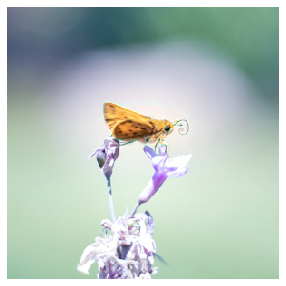

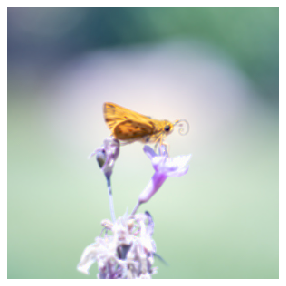

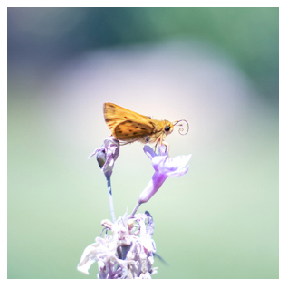

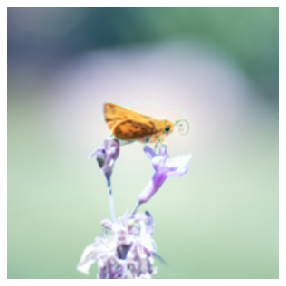

In [95]:
image_hls = rgb2hls(image_color)
display(hls2rgb(ncf(image_hls, filter_hls1, "HSL", "H", "replicate")))
display(hls2rgb(ncf(image_hls, filter_hls1, "HSL", "S", "replicate")))
display(hls2rgb(ncf(image_hls, filter_hls1, "HSL", "L", "replicate")))
display(hls2rgb(ncf(image_hls, filter_hls1, "HSL", "HSL", "replicate")))

## Advanced exercise 1

Recall from lecture that at the edges, filters only partially overlap with the image pixels, so we need a way to provide numbers that are out of bounds. The provided implementation uses the strategy we discussed in lecture, zero-padding, which just treats all out-of-bounds pixels as zero.

A different strategy is edge value replication: treat all out-of-bounds pixels as having the same value as the closest in-bounds pixel. Another one is mirror extension: treat the border of the image as a mirror, and use the pixel value that would be reflected into the out-of-bounds space. These are not the only strategies -- you're welcome to research others on your own.

Modify naive_convolutional_filter to implement one or more of these strategies. How does that change the output of filters?

In [91]:
filter1_mod = np.array(
[
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]
])

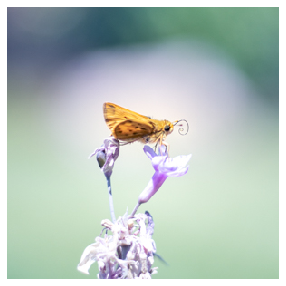

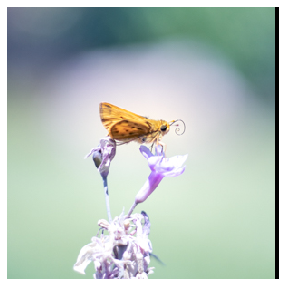

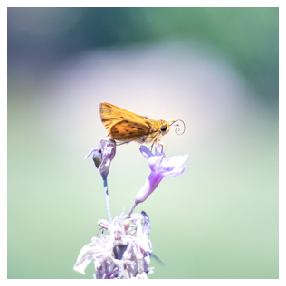

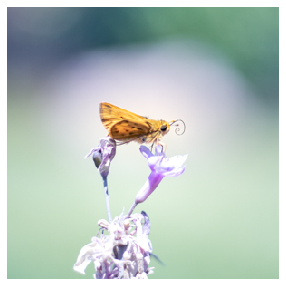

In [92]:
display(image_color)
display(ncf(image_color, filter1_mod, "RGB", "RGB", "zero"))
display(ncf(image_color, filter1_mod, "RGB", "RGB", "replicate"))
display(ncf(image_color, filter1_mod, "RGB", "RGB", "mirror"))

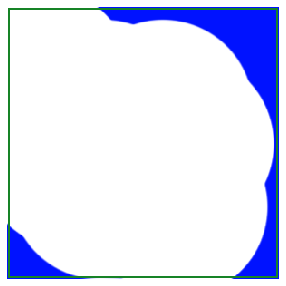

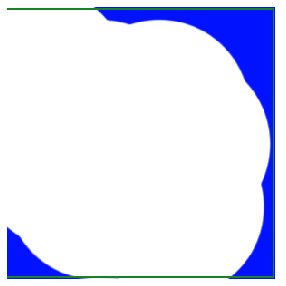

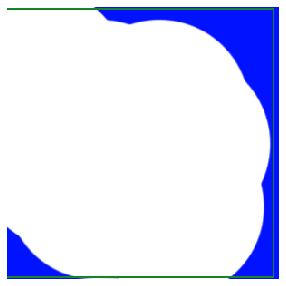

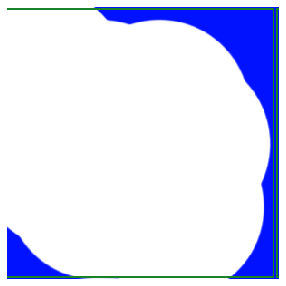

In [93]:
image_rect = load("./rectangle.png")
display(image_rect)
display(ncf(image_rect, filter1_mod, "RGB", "RGB", "zero"))
display(ncf(image_rect, filter1_mod, "RGB", "RGB", "replicate"))
display(ncf(image_rect, filter1_mod, "RGB", "RGB", "mirror"))

**Answer:**

I created the mentioned zero, replicate, and mirror functions. See the `ncf()` function above for my code.

**Zero** is pretty basic: when the kernel overlaps the edge of the image, it sets the out of bound values as 0s (the color black). Which is why I'm confused that in the `image_rect` example, the right edge of the image turned white and not black. The function works fine (turns the edge black) for `image_color`, and everything looks good in the code itself. Maybe it's because of the .png instead of .jpg format (PNGs have transparency)? **Replicate** was also pretty easy: when the kernel overlaps, just keep going with the same pixel value on the edge of the image. This worked fine, and is easy to see in the `image_rect` example. **Mirror** was slightly harder to create, as when the kernel overlaps the out of bounds values are reflected back onto the image, ergo the name mirror. Again, you can see the sucessful results in the `image_rect` example.

## Advanced exercise 2

You may have noticed that `naive_convolutional_filter` is quite slow. Create an implementation that is faster, using the `time` library to demonstrate the difference in performance. Your implementation must return the same output as the naive implementation.


I didn't quite finish this yet, but I added comments to describe what my code does and what I still need to implement. I'll try and finish this up in the future!

In [94]:
def ncf2(image, kernel, space, channel, edge_behavior="zero"):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
        space: the color space (i.e., "RGB")
        channel: the channel which the filter will be applied to (R, G, B)
        edge_behavior: "zero" or "replicate" or "mirror"
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    
    out = image.copy()
    
    if channel == space[0]:
        channel_index = 0
    elif channel == space[1]:
        channel_index = 1
    else:
        channel_index = 2
        
    image = np.asarray(image)
    kernel = np.asarray(kernel)
    
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):
            
            # take slice of image that matches the current kernel, without going out of bounds
            image_slice = image[image_row:min(image.shape[0]-1, image_row+(kernel.shape[0]//2)), image_column:min(image_column.shape[1]-1, image_column+(kernel.shape[1]//2))]
            
            # add out of bounds values so image_slice.shape == kernel.shape
            """
                code here
            """
            
            # multiply slice by kernel
            sliceXkernel = image_slice * kernel
            
            # take the sum
            output_value = np.sum(sliceXkernel)
            
            # set the new value
            out[image_row, image_column, channel_index] = output_value
            
    return out
